
                
# Air Quality Analysis on EPA DataSet
All of this data comes from EPA’s Air Quality System (AQS). Data collection agencies report their data to EPA via this system and it calculates several types of aggregate (summary) data for EPA internal use. This includes daily and annual summaries, but not monthly summaries, as these are not routinely needed by EPA. More details can be found at: https://aqs.epa.gov/aqsweb/airdata/FileFormats.html

Refer to the field descriptions at : https://github.com/colaberry/hackathons/blob/master/data/aq_field_descriptions.csv
                
## Air Quality Analysis Problem
It is an official dataset from EPA [Environmental Protection Agency]. It is about air pollutants in various locations of USA.
Here is the description of the problem:

### Competition Description
Air pollutants is a term used internationally to describe air pollutants that have been regulated and are used as indicators of air quality. There are many adverse effects of air pollutants like Acid rain, Ozone layer depletion and many more. The primary pollutants in air are Carbon Monoxide(CO), Nitrogen Dioxide(NO2), Particulate Matter(PM) and Sulphur Dioxide(SO2).

The Air Quality Modeling Group (AQMG) is in the EPA's Office of Air and Radiation (OAR) and leads in the full range of air quality models, air pollution forecast, atmospheric dispersion modeling and other mathematical simulation techniques used in assessing the impacts of air pollution sources and control strategies. It serves other EPA headquarters staff, EPA regional Offices, and State and local environmental agencies, coordinates with the EPA's Office of Research and Development on the development of new models and techniques, and wider issues of atmospheric research and conducts modeling analyses to support policy and regulatory decisions of the EPA's Office of Air Quality Planning and Standards (OAQPS). It is located in Research Triangle Park, North Carolina. Controlling air pollution helps diminish the risk of pollution-related diseases.

In this challenge, we ask you to perform Exploratory Data Analysis on the dataset and develop a Clustering model to group data based on Air Quality.

#### Loading the Data
 <li>The data has been split into train_data, test_data and can be loaded with read_csv command:</li>
 [Dataset Link: https://raw.githubusercontent.com/colaberry/data/master/8hour_42101_2017_10K.csv]

In [1]:
#import libraries
#To display graphs in the notebook
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from scipy.stats.stats import pearsonr
import numpy as np

data=pd.read_csv("https://raw.githubusercontent.com/colaberry/data/master/8hour_42101_2017_10K.csv")

#### Hint: To display the first five datasets in the csv file, use head()

In [2]:
h1=data.head()

In [3]:
#this is assertion block which verifies the solution.

try:
    def verify_answer():
        if h1 == data.head() :
            return True
        else:
            return False

    ref_assert_var = verify_answer()
except Exception as e:
    print('Your assertion block throws error: ' + str(e))
else:
    if ref_assert_var:
        print('continue')
    else:
        print('The answer did not pass the test.')

Your assertion block throws error: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


## Air Quality Analysis - Data Selection and Preparation

Prior to developing a cluster model, we have to examine the dataset with information from EDA as well as using other statistical methods.The Clustering Algorithm is a unsupervised learning technique.


#### Describe the dataset:
<li>The data has to be described using describe()</li>

In [4]:
data.describe()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Observation Count,Observations with Events,Null Observations,Mean Including All Data,Mean Excluding All Flagged Data,Mean Excluding Concurred Flags
count,9999.0,9999.0,9999.000000,9999.0,9999.000000,9999.000000,9999.000000,9999.000000,9999.0,9999.000000,9999.000000,9999.000000,9999.000000
mean,1.0,73.0,981.175418,42101.0,1.302030,33.515256,-86.866393,7.690069,0.0,0.308631,0.267757,0.267757,0.267757
std,0.0,0.0,761.031980,0.0,0.459161,0.028778,0.044300,0.664937,0.0,0.663811,0.214167,0.214167,0.214167
min,1.0,73.0,23.000000,42101.0,1.000000,33.485556,-86.915000,6.000000,0.0,0.000000,-0.200000,-0.200000,-0.200000
25%,1.0,73.0,23.000000,42101.0,1.000000,33.485556,-86.915000,8.000000,0.0,0.000000,0.100000,0.100000,0.100000
50%,1.0,73.0,1003.000000,42101.0,1.000000,33.521427,-86.844112,8.000000,0.0,0.000000,0.200000,0.200000,0.200000
75%,1.0,73.0,2059.000000,42101.0,2.000000,33.553056,-86.815000,8.000000,0.0,0.000000,0.300000,0.300000,0.300000
max,1.0,73.0,2059.000000,42101.0,2.000000,33.553056,-86.815000,8.000000,0.0,2.000000,2.300000,2.300000,2.300000


### State Code & Country Code
we can see that the rows in the state and country code have single values. So we bother least about them as they are not critical variables that are contributing in the analysis.Hence we drop the columns state and country.
Now let us look at the pollutants in the dataset.
#### Hint: 
Use unique() method, drop("columnname",axis)

In [5]:
data["Parameter Name"].unique()
data.drop(["County Code","State Code"],axis=1)


,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Date Local,Time Local,Date GMT,...,Sample Duration,Pollutant Standard,Units of Measure,Observation Count,Observations with Events,Null Observations,Mean Including All Data,Mean Excluding All Flagged Data,Mean Excluding Concurred Flags,Date of Last Change
0,23,42101,2,33.553056,-86.815000,WGS84,Carbon monoxide,2017-01-01,05:00,2017-01-01,...,8-HR RUN AVG END HOUR,CO 8-hour 1971,Parts per million,6,0,0,0.1,0.1,0.1,2017-04-19
1,23,42101,2,33.553056,-86.815000,WGS84,Carbon monoxide,2017-01-01,06:00,2017-01-01,...,8-HR RUN AVG END HOUR,CO 8-hour 1971,Parts per million,7,0,0,0.2,0.2,0.2,2017-04-19
2,23,42101,2,33.553056,-86.815000,WGS84,Carbon monoxide,2017-01-01,07:00,2017-01-01,...,8-HR RUN AVG END HOUR,CO 8-hour 1971,Parts per million,8,0,0,0.2,0.2,0.2,2017-04-19
3,23,42101,2,33.553056,-86.815000,WGS84,Carbon monoxide,2017-01-01,08:00,2017-01-01,...,8-HR RUN AVG END HOUR,CO 8-hour 1971,Parts per million,8,0,0,0.2,0.2,0.2,2017-04-19
4,23,42101,2,33.553056,-86.815000,WGS84,Carbon monoxide,2017-01-01,09:00,2017-01-01,...,8-HR RUN AVG END HOUR,CO 8-hour 1971,Parts per million,8,0,0,0.3,0.3,0.3,2017-04-19
5,23,42101,2,33.553056,-86.815000,WGS84,Carbon monoxide,2017-01-01,10:00,2017-01-01,...,8-HR RUN AVG END HOUR,CO 8-hour 1971,Parts per million,8,0,0,0.3,0.3,0.3,2017-04-19
6,23,42101,2,33.553056,-86.815000,WGS84,Carbon monoxide,2017-01-01,11:00,2017-01-01,...,8-HR RUN AVG END HOUR,CO 8-hour 1971,Parts per million,8,0,0,0.4,0.4,0.4,2017-04-19
7,23,42101,2,33.553056,-86.815000,WGS84,Carbon monoxide,2017-01-01,12:00,2017-01-01,...,8-HR RUN AVG END HOUR,CO 8-hour 1971,Parts per million,8,0,0,0.4,0.4,0.4,2017-04-19
8,23,42101,2,33.553056,-86.815000,WGS84,Carbon monoxide,2017-01-01,13:00,2017-01-01,...,8-HR RUN AVG END HOUR,CO 8-hour 1971,Parts per million,8,0,0,0.5,0.5,0.5,2017-04-19
9,23,42101,2,33.553056,-86.815000,WGS84,Carbon monoxide,2017-01-01,14:00,2017-01-01,...,8-HR RUN AVG END HOUR,CO 8-hour 1971,Parts per million,8,0,0,0.5,0.5,0.5,2017-04-19


In [6]:
print("you have succesfully completed the task")

you have succesfully completed the task


## Latitude and Longitude:
we will plot a graph showing latitudes and Longitudes over the distribution 
Plot Histogram:
<li>use data["attribute_name"].hist()</li>


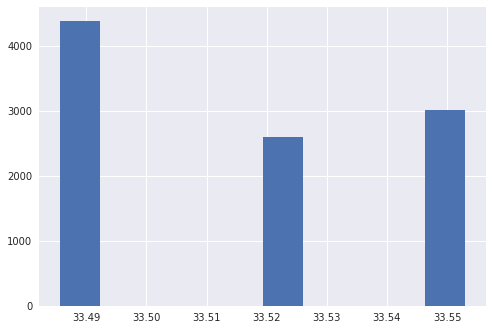

In [7]:
data["Latitude"].hist()

## hint : Do the longitude as similar

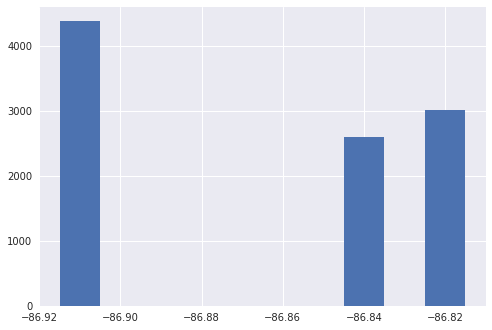

In [8]:
data["Longitude"].hist()

In [9]:
print("you have successfully printed the histogram")

you have successfully printed the histogram


Since there are only three pairs of latitude and longitudes,we will only consider site id.

In [10]:
data.drop(["Latitude","Longitude"],axis=1)

,State Code,County Code,Site Num,Parameter Code,POC,Datum,Parameter Name,Date Local,Time Local,Date GMT,...,Sample Duration,Pollutant Standard,Units of Measure,Observation Count,Observations with Events,Null Observations,Mean Including All Data,Mean Excluding All Flagged Data,Mean Excluding Concurred Flags,Date of Last Change
0,1,73,23,42101,2,WGS84,Carbon monoxide,2017-01-01,05:00,2017-01-01,...,8-HR RUN AVG END HOUR,CO 8-hour 1971,Parts per million,6,0,0,0.1,0.1,0.1,2017-04-19
1,1,73,23,42101,2,WGS84,Carbon monoxide,2017-01-01,06:00,2017-01-01,...,8-HR RUN AVG END HOUR,CO 8-hour 1971,Parts per million,7,0,0,0.2,0.2,0.2,2017-04-19
2,1,73,23,42101,2,WGS84,Carbon monoxide,2017-01-01,07:00,2017-01-01,...,8-HR RUN AVG END HOUR,CO 8-hour 1971,Parts per million,8,0,0,0.2,0.2,0.2,2017-04-19
3,1,73,23,42101,2,WGS84,Carbon monoxide,2017-01-01,08:00,2017-01-01,...,8-HR RUN AVG END HOUR,CO 8-hour 1971,Parts per million,8,0,0,0.2,0.2,0.2,2017-04-19
4,1,73,23,42101,2,WGS84,Carbon monoxide,2017-01-01,09:00,2017-01-01,...,8-HR RUN AVG END HOUR,CO 8-hour 1971,Parts per million,8,0,0,0.3,0.3,0.3,2017-04-19
5,1,73,23,42101,2,WGS84,Carbon monoxide,2017-01-01,10:00,2017-01-01,...,8-HR RUN AVG END HOUR,CO 8-hour 1971,Parts per million,8,0,0,0.3,0.3,0.3,2017-04-19
6,1,73,23,42101,2,WGS84,Carbon monoxide,2017-01-01,11:00,2017-01-01,...,8-HR RUN AVG END HOUR,CO 8-hour 1971,Parts per million,8,0,0,0.4,0.4,0.4,2017-04-19
7,1,73,23,42101,2,WGS84,Carbon monoxide,2017-01-01,12:00,2017-01-01,...,8-HR RUN AVG END HOUR,CO 8-hour 1971,Parts per million,8,0,0,0.4,0.4,0.4,2017-04-19
8,1,73,23,42101,2,WGS84,Carbon monoxide,2017-01-01,13:00,2017-01-01,...,8-HR RUN AVG END HOUR,CO 8-hour 1971,Parts per million,8,0,0,0.5,0.5,0.5,2017-04-19
9,1,73,23,42101,2,WGS84,Carbon monoxide,2017-01-01,14:00,2017-01-01,...,8-HR RUN AVG END HOUR,CO 8-hour 1971,Parts per million,8,0,0,0.5,0.5,0.5,2017-04-19


Now let us see whether null observations affect the mean values
### Find Correlation
There are many ways to find correlation
for ex: use pearsonr(attribute_values) 

In [11]:
pearsonr(data["Mean Including All Data"],data["Null Observations"])

(0.16315296275319405, 1.3181710695651812e-60)

In [12]:
print("you found the correlation")

you found the correlation


Through pearson correlation we found that there is no relation between the attributes

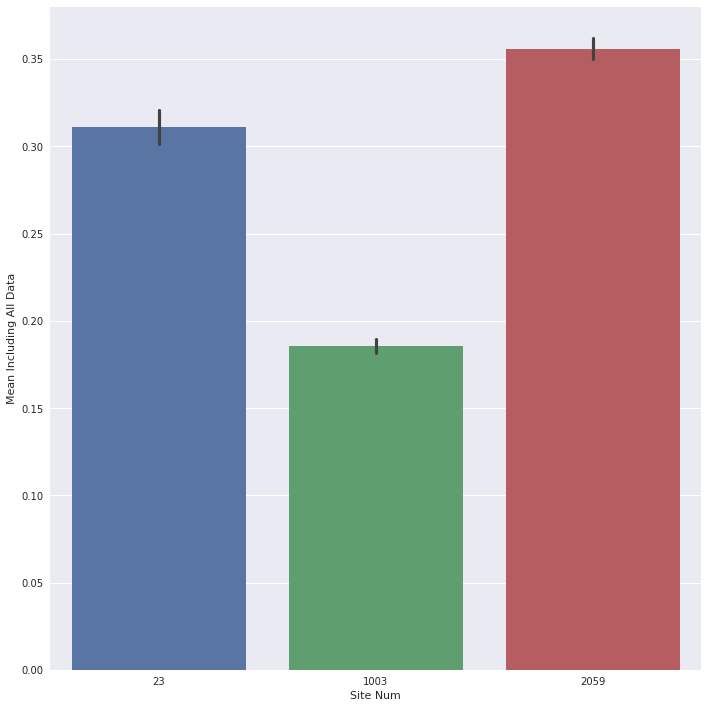

In [13]:
g=sns.factorplot(x="Site Num",y="Mean Including All Data",data=data,size=10,kind="bar")


Considering the factorplot we can conclude that the siteid 2059 is most prone to CO pollutant

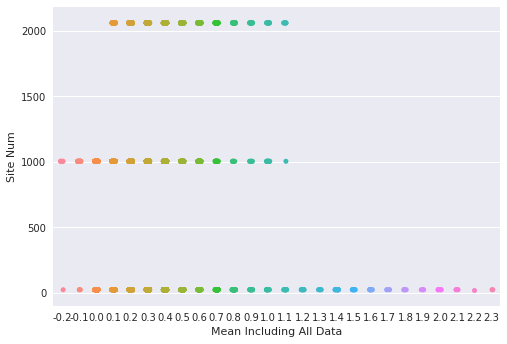

In [14]:
siteid=np.array(data["Site Num"])
meanval=np.array(data["Mean Including All Data"])
sns.stripplot(x='Mean Including All Data', y='Site Num', data=data, jitter=True)
sns.despine()

In [15]:
print("you have succesfully ploted the scatter plot")

you have succesfully ploted the scatter plot


From the above we can see that CO is the only pollutant that is present in this dataset.

## Mean ppm of CO present
Let us look how mean of CO attribute distributed over the dataset.

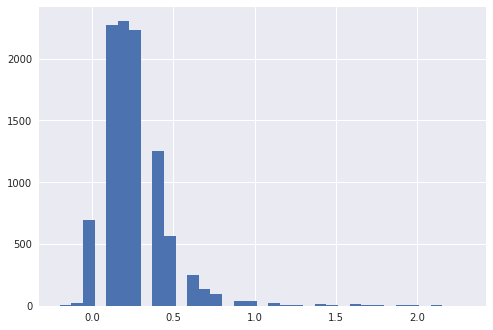

In [16]:
data["Mean Including All Data"].hist(bins=35)

From the above Graph we can conclude that the most of ppm values of the CO is in the range of 0 to 0.5

# Features Available 

## Site Num
A unique number within the county identifying the site. We can see that there are NaN values in the field.

## Parameter Code
The AQS code corresponding to the parameter measured by the monitor. It contains only single value.

## POC
This is the “Parameter Occurrence Code” used to distinguish different instruments that measure the same parameter at the same site. There are two unique values in the field(1,2).


In [17]:
data["Site Num"].unique()

array([  23, 1003, 2059])

In [18]:
print("Got unique values of Site num")

Got unique values of Site num


# Finding the relation between site and mean

In [19]:
pd.crosstab(data["Mean Including All Data"],data["Site Num"],margins=True)

Site Num,23,1003,2059,All
Mean Including All Data,,,,
-0.2,1,5,0,6
-0.1,3,21,0,24
0.0,170,521,0,691
0.1,495,1693,84,2272
0.2,827,980,497,2304
0.3,693,571,968,2232
0.4,351,357,543,1251
0.5,197,137,232,566
0.6,72,52,124,248


similarly for POC

In [20]:
data["POC"].unique()

array([2, 1])

In [21]:
print("unique")

unique


# Cluster Algorithm

In [22]:
features=["Mean Including All Data"]
train,test=train_test_split(data,train_size=0.9)
k_means=KMeans(n_clusters=3,init='k-means++',precompute_distances='auto')
k_means.fit(train[features])
y=k_means.predict(test[features])
Y_color = np.zeros(shape=(y.size, 3))
Y_color[y == 0] = (1,0,0)
Y_color[y == 1] = (0,1,0)
Y_color[y == 2]= (0,0,1)
print(y)

[2 2 0 2 2 0 2 0 2 2 2 2 2 0 2 0 0 2 1 2 0 2 0 0 1 2 0 0 0 2 2 0 2 2 0 2 2
 2 0 2 0 0 0 2 2 2 0 0 0 0 0 0 0 0 2 0 0 2 0 2 0 0 2 0 2 2 2 0 0 0 0 2 2 0
 0 0 2 0 2 2 0 2 0 0 0 2 0 0 2 0 0 0 2 0 2 2 2 2 0 0 2 0 0 2 2 0 2 0 0 2 0
 0 2 0 0 0 2 2 1 0 0 2 2 2 2 0 2 0 2 2 2 2 1 0 2 2 2 0 2 2 0 0 0 2 2 0 0 2
 2 2 0 2 0 2 2 2 0 2 0 0 2 2 0 2 2 0 0 2 0 0 2 0 0 2 0 0 2 0 2 0 2 0 2 0 0
 0 2 0 2 2 0 2 0 0 0 0 2 0 0 2 0 2 0 2 0 2 0 2 2 0 0 0 2 2 2 0 0 0 0 0 0 0
 0 2 2 0 2 2 2 2 0 2 0 2 2 0 0 2 2 0 0 0 2 0 2 0 2 0 0 2 2 2 2 0 0 0 0 0 2
 0 0 0 2 2 2 2 0 1 2 2 2 0 2 2 2 2 2 2 2 0 2 2 0 0 2 0 2 0 2 0 2 2 2 0 0 2
 2 2 0 2 0 0 2 0 2 2 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 0 0 2 0 2 2 0 0 2 2 2 2
 2 0 0 2 2 2 0 0 2 0 0 2 0 2 2 2 0 0 2 0 2 0 0 2 2 2 0 1 2 2 1 2 2 2 0 2 0
 2 2 0 2 2 2 0 0 2 2 0 2 0 0 2 0 0 0 2 0 0 0 2 2 2 0 0 0 2 2 2 0 0 1 0 0 0
 2 0 0 0 2 2 2 2 0 2 0 0 0 2 2 0 2 0 0 2 0 2 0 0 2 2 2 0 2 2 2 2 0 0 2 2 2
 2 0 0 0 0 2 2 0 0 0 2 2 2 0 2 0 2 0 2 2 2 0 0 0 2 2 2 0 0 2 2 2 2 0 0 0 2
 2 2 0 0 0 2 2 2 2 0 0 2 

Now let us plot scatter plot

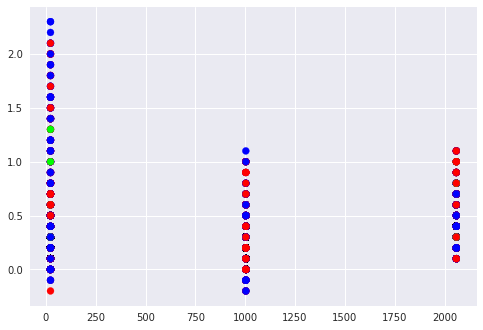

In [23]:
plt.scatter(siteid,meanval,color=Y_color)
plt.show()